# Maids.cc assessment project:
# Price Classification System (AI System) using Python and SpringBoot
Name: Omar Hassan
email: omar.hbakr@gmail.com

In [5]:
#Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle



## Exploratory data analysis (EDA)

### 1. Data loading and overview

In [6]:

# Load the dataset
file_path = "train.csv"
data = pd.read_csv(file_path)

# Display first few rows
data.head()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0,0.0,7.0,0.6,188.0,2.0,...,20.0,756.0,2549.0,9.0,7.0,19,0,0,1,1
1,1021,1,0.5,1,0.0,1.0,53.0,0.7,136.0,3.0,...,905.0,1988.0,2631.0,17.0,3.0,7,1,1,0,2
2,563,1,0.5,1,2.0,1.0,41.0,0.9,145.0,5.0,...,1263.0,1716.0,2603.0,11.0,2.0,9,1,1,0,2
3,615,1,2.5,0,0.0,0.0,10.0,0.8,131.0,6.0,...,1216.0,1786.0,2769.0,16.0,8.0,11,1,0,0,2
4,1821,1,1.2,0,13.0,1.0,44.0,0.6,141.0,2.0,...,1208.0,1212.0,1411.0,8.0,2.0,15,1,1,0,1


### 2. Univariant analysis

In [7]:
# Check for missing values and data types
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             1995 non-null   float64
 5   four_g         1995 non-null   float64
 6   int_memory     1995 non-null   float64
 7   m_dep          1995 non-null   float64
 8   mobile_wt      1996 non-null   float64
 9   n_cores        1996 non-null   float64
 10  pc             1995 non-null   float64
 11  px_height      1996 non-null   float64
 12  px_width       1998 non-null   float64
 13  ram            1998 non-null   float64
 14  sc_h           1999 non-null   float64
 15  sc_w           1999 non-null   float64
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

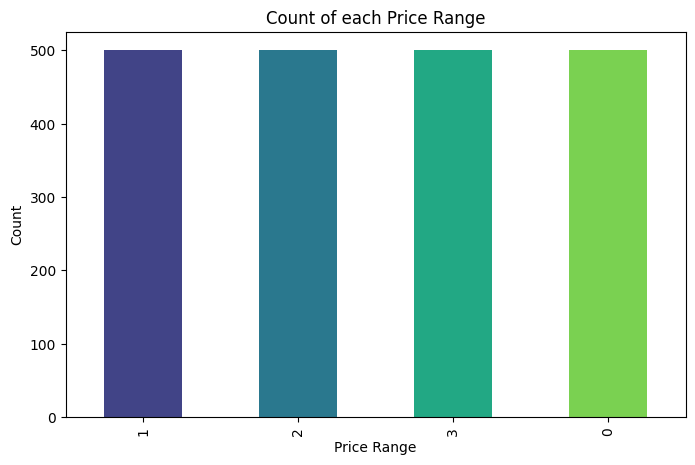

In [8]:
# Test the data balance

# Count occurrences of each class
price_range_counts = data['price_range'].value_counts()

# Plotting the counts
plt.figure(figsize=(8, 5))
palette = sns.color_palette("viridis", len(price_range_counts))
price_range_counts.plot(kind='bar', color=palette)
plt.title('Count of each Price Range')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.show()

In [9]:
# Get summary statistics
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,1995.000000,1995.000000,1995.000000,1995.000000,1996.000000,1996.000000,...,1996.000000,1998.000000,1998.000000,1999.000000,1999.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.310276,0.521303,32.048120,0.502256,140.266533,4.518036,...,644.651804,1251.287788,2124.262262,12.303652,5.766383,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.335766,0.499671,18.146476,0.288530,35.384676,2.288946,...,443.355443,432.352930,1085.273372,4.212373,4.357400,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.000000,874.250000,1206.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2147.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3065.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


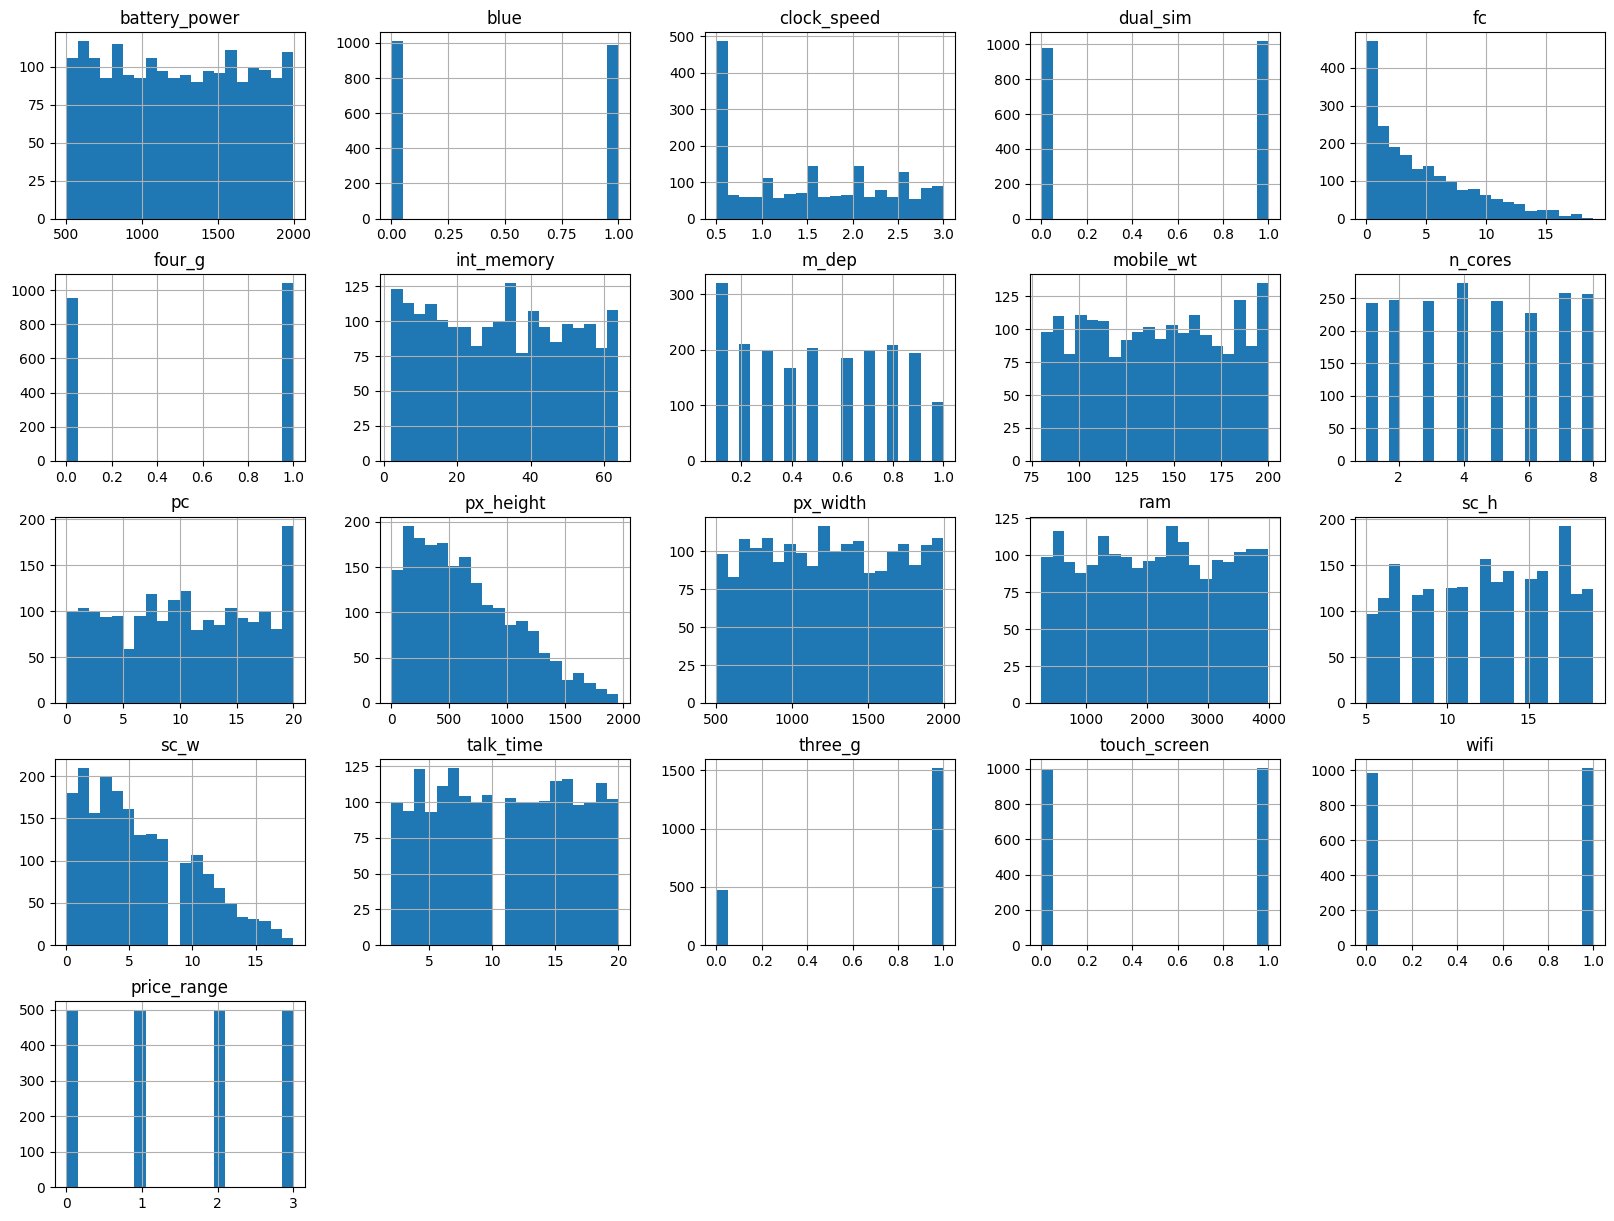

In [10]:

# Plot histograms for all numerical features
data.hist(bins=20, figsize=(20, 15))
plt.show()

From the univariant analysis we can conclude
1. Not much null values so we can drop nulls without affecting the data representation for population
2. The data is well-balanced, so no need for balacing techniques.


### 3. Bivariant analysis

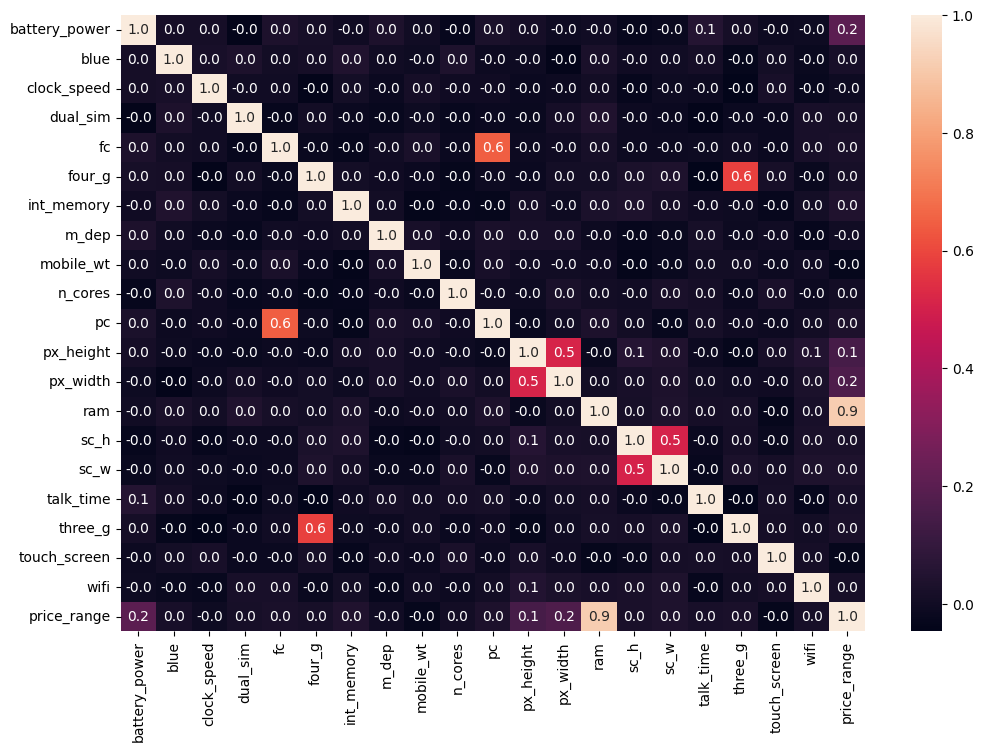

In [11]:

# Compute the correlation matrix
correlation_matrix = data.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True,fmt='.1f')
plt.show()

In [ ]:

# Compute the correlation matrix
correlation_matrix = data.iloc[:,0:10].corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True,fmt='.1f')
plt.show()

In [ ]:

# Compute the correlation matrix
correlation_matrix = data.iloc[:,10:].corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.1f')
plt.show()

From the correlation map we can notice high correlation between ram size and price_range which indicate that ram is a crucial predictor of device price.

## 2. Feature engineering
In feature engineering I can do many steps like

1. Creating more features e.g. screen_area = sc_h*sc_w
2. classifiying numerical features into categories e.g. ram into 4 categories [0,1,2,3]
3. Feature scalling to normalize the data
4. Drop null values

I will just go with Feature scalling for simplicity

In [ ]:
data.dropna(inplace = True)

## 3. Model fitting
In this section I will try to evaluate the performance of many muliclass classification model to assess the performance of each.

For model evaluation I split the data in *train.csv* into train and test data. After choosing the best model I will save the scaller and model at .pkl file for later use on test data




In [ ]:
def model_Evaluate(y_test, y_pred):

  # Print classification report
  print(classification_report(y_test, y_pred))

  # Print confusion matrix
  print(confusion_matrix(y_test, y_pred))

  # Print accuracy
  accuracy = accuracy_score(y_test, y_pred)
  print(f"Accuracy: {accuracy:.2f}")


####  1. Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define features and target
X = data.drop(columns=['price_range'])
y = data['price_range']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#scalling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Save the scaler to a file
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

# Initialize Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)
model_Evaluate(y_test, y_pred)

#### 2. Logistic regression

In [ ]:
#Logistic regression
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
model_Evaluate(y_test, y_pred)

#### 3. SVM

In [ ]:
from sklearn.svm import SVC

clf = SVC(kernel='linear', decision_function_shape='ovr')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
model_Evaluate(y_test, y_pred)
# Save the model to a file
with open("model.pkl", "wb") as f:
    pickle.dump(clf, f)

#### 4. XGBoost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
model_Evaluate(y_test, y_pred)

What we can notic is SVM has the best performance on the data in terms of accuracy and F1 score.

## 4. Model assessment on the train.csv and test.csv files

#### 1. load data in test.csv

In [ ]:
test_data = pd.read_csv('test.csv')
test_data.head()

#### 2. Load the model and scaler then test on the training data

In [ ]:
#load model
with open("model.pkl", "rb") as f:
    loaded_model = pickle.load(f)
# Load the scaler later
with open("scaler.pkl", "rb") as f:
    loaded_scaler = pickle.load(f)

In [ ]:
id = 200
sample = data.iloc[id,0:20].values.reshape(1,-1)
#saclling
scaled_sample = loaded_scaler.transform(sample)
truth = data.iloc[id,20]

print(sample)
print("price range is: " + str(truth))

prediction = loaded_model.predict(scaled_sample)
print("predicted price range is: " + str(prediction))

#### 3. predictions on 10 samples of test data

In [ ]:
#first 10 samples
sample = test_data.iloc[0:10,1:21]
#saclling
scaled_sample = loaded_scaler.transform(sample)

prediction = loaded_model.predict(scaled_sample)
print("predicted price range is: " + str(prediction))

In [ ]:
for i in range(10):
  print("for id = " + str(i+1) + " the prediction is: "+ str(prediction[i]))

In [ ]:
test_data.iloc[0:10].to_json('test.json',orient="records")

In [ ]:
#------------------------------------------------------------------------------------------

In [ ]:
import json
with open('test.json', "r") as file:
  j = json.load(file)



In [ ]:
j[0]